In [2]:
# 당뇨병
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()


df_X = diabetes.data
df_y = diabetes.target

diabetes.data.size

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [3]:
# (2) 모델에 입력할 데이터 X 준비하기
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.


import numpy as np

df_X = np.array(df_X)
print(df_X.shape)


# (3) 모델에 예측할 데이터 y 준비하기
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.


df_y = np.array(df_y)
print(df_y.shape)

# (4) train 데이터와 test 데이터로 분리하기
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=9933, shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(442, 10)
(442,)
(353, 10) (353,)
(89, 10) (89,)


Iteration 100 : Loss 6235.3391


Iteration 200 : Loss 5759.5038
Iteration 300 : Loss 5682.9308
Iteration 400 : Loss 5615.4496
Iteration 500 : Loss 5550.1289
Iteration 600 : Loss 5486.7797
Iteration 700 : Loss 5425.3338
Iteration 800 : Loss 5365.7276
Iteration 900 : Loss 5307.8995
Iteration 1000 : Loss 5251.7902
Iteration 1100 : Loss 5197.3423
Iteration 1200 : Loss 5144.5005
Iteration 1300 : Loss 5093.2115
Iteration 1400 : Loss 5043.4237
Iteration 1500 : Loss 4995.0873
Iteration 1600 : Loss 4948.1542
Iteration 1700 : Loss 4902.5781
Iteration 1800 : Loss 4858.3143
Iteration 1900 : Loss 4815.3194
Iteration 2000 : Loss 4773.5517
Iteration 2100 : Loss 4732.9709
Iteration 2200 : Loss 4693.5381
Iteration 2300 : Loss 4655.2158
Iteration 2400 : Loss 4617.9676
Iteration 2500 : Loss 4581.7586
Iteration 2600 : Loss 4546.5548
Iteration 2700 : Loss 4512.3237
Iteration 2800 : Loss 4479.0337
Iteration 2900 : Loss 4446.6544
Iteration 3000 : Loss 4415.1563
Iteration 3100 : Loss 4384.5111
Iteration 3200 : Loss 4354.6913
Iteration 3300 :

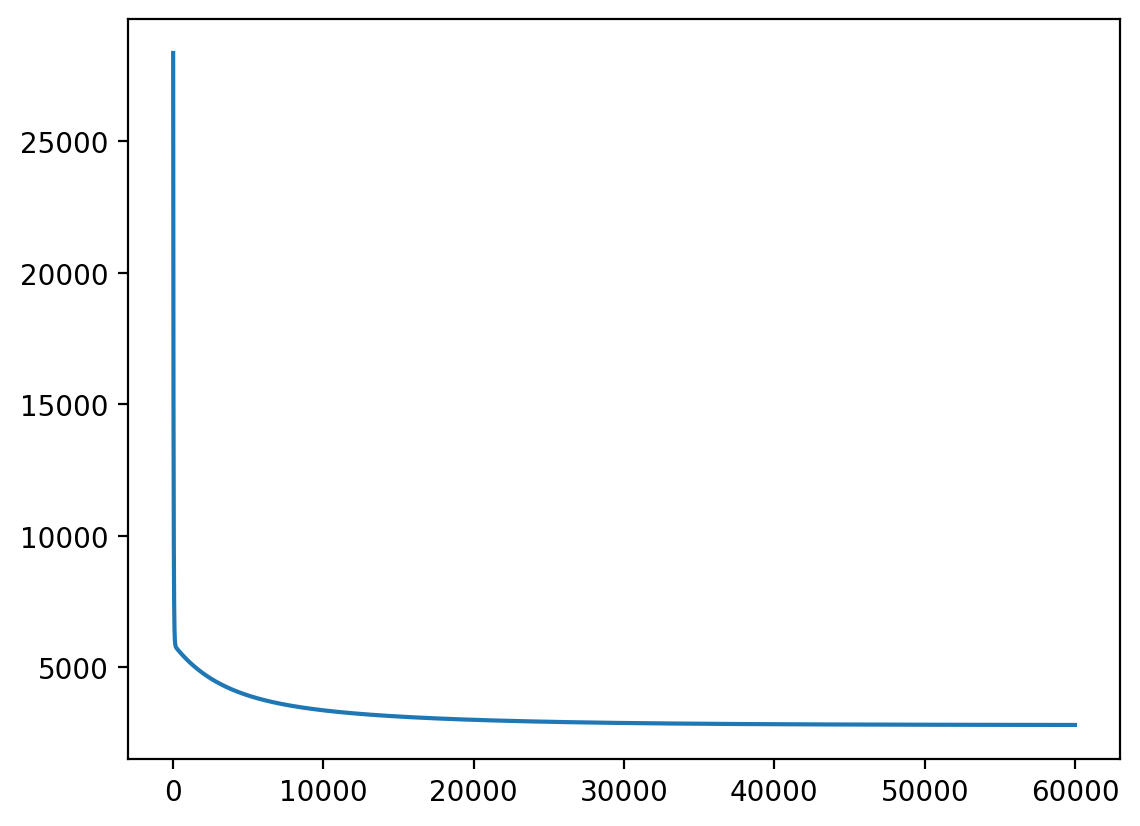

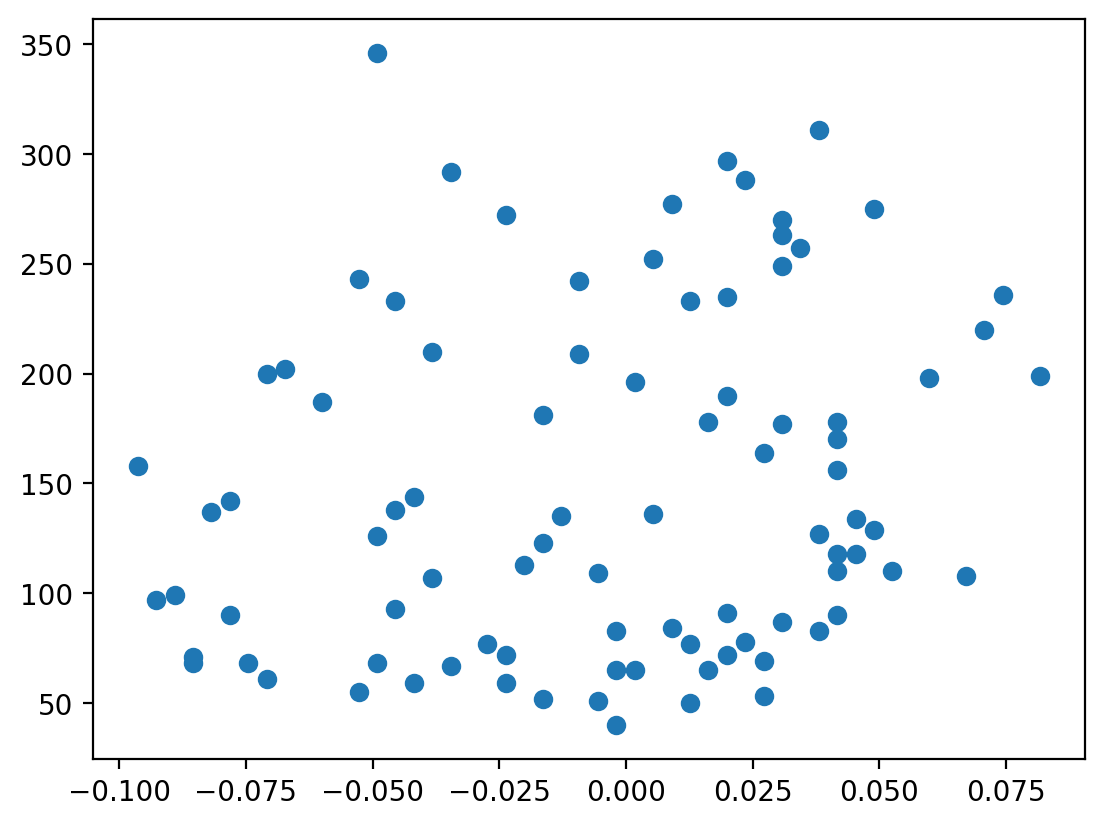

In [4]:
# (5) 모델 준비하기


# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
W = np.random.rand(10)
b = np.random.rand()


# 모델 함수를 구현해주세요.
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


# (6) 손실함수 loss 정의하기

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse


def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, y, W, b):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db


# (8) 하이퍼 파라미터인 학습률 설정하기
# 학습률, learning rate 를 설정해주세요
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
learning_rate = 0.01

# (9) 모델 학습하기
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
losses = []

for i in range(1, 60001):
    dW, db = gradient(X_train, y_train, W, b)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print("Iteration %d : Loss %0.4f" % (i, L))


# (10) test 데이터에 대한 성능 확인하기
# test 데이터에 대한 성능을 확인해주세요.

prediction = model(X_test, W, b)
prediction.size
mse = loss(X_test, W, b, y_test)
mse


# (11) 정답 데이터와 예측한 데이터 시각화하기
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.


plt.plot(losses)
plt.show()


plt.scatter(X_test[:, 0], y_test)
plt.show()